# Exploratory Data Analysis (EDA)
 is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It's a crucial step in understanding the data before diving into more complex analyses or modeling. During EDA, you might examine things like distributions of variables, correlations between variables, missing values, outliers, and other patterns or anomalies in the data.

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/pragati'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/pragati/assignment4.cpp
/content/drive/MyDrive/pragati/tree.cpp
/content/drive/MyDrive/pragati/Used_Motor_cycle_price_prediction_9.csv


In [2]:
df = pd.read_csv('/content/drive/MyDrive/pragati/Used_Motor_cycle_price_prediction_9.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [4]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts(), end='\n'*3)

name
Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
                                 ..
Hero Honda CD100SS                1
Royal Enfield Thunderbird 500     1
BMW G310GS                        1
TVS Radeon                        1
Bajaj  ct 100                     1
Name: count, Length: 279, dtype: int64


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64




This code calculates the total unique values per attribute.

In [5]:
df.replace({'1st owner':1, '2nd owner':2, '3rd owner':3, '4th owner':4}, inplace=True)
df.rename(columns = {'owner':'prev_owners'}, inplace=True)

The above code converts the owners attribute to an integer format.

In [6]:
current_year = 2024
df['age'] = current_year - df['year']

The above code sets the current year 2024

In [7]:
#df.drop(['year','name'], axis=1, inplace=True)
df.head()

,name,selling_price,year,seller_type,prev_owners,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN,5
1,Honda Dio,45000,2017,Individual,1,5650,NaN,7
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,9
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN,13


In [8]:
df_2 = df.copy()

df.ex_showroom_price.fillna(df.ex_showroom_price.mean(), inplace=True)

The dataset has many missing values in the ex-showroom price attribute. So replacing the missing with the average value.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   prev_owners        1061 non-null   int64  
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
 7   age                1061 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 66.4+ KB


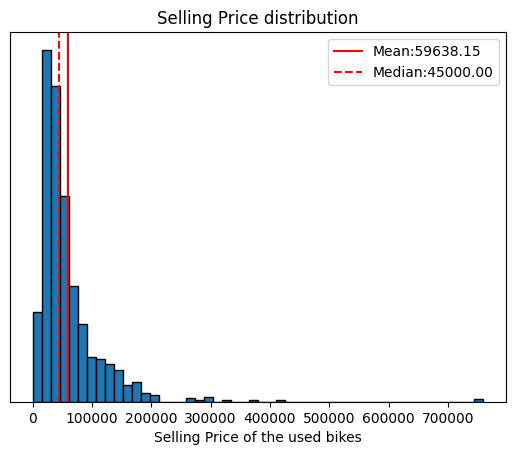

In [10]:
fig, axes = plt.subplots(1, 1)
num_bins = (df['selling_price'].max() - df['selling_price'].min()) // 150

color1 = '#1f77b4' # a shade of blue
color2 = '#ff7f0e' # a shade of orange

plt.hist(df['selling_price'], bins=50, range=(0,df['selling_price'].max()), color=color1,edgecolor='black')

plt.yticks([])
plt.title("Selling Price distribution")
plt.xlabel("Selling Price of the used bikes")

#plt.subplots_adjust(hspace=0.5)
sp_mean = df['selling_price'].mean()
plt.axvline(sp_mean, color='red', linewidth=1.5, label=f'Mean:{sp_mean:.2f}')
sp_median = df['selling_price'].median()
plt.axvline(sp_median, color='red', linewidth=1.5, label=f'Median:{sp_median:.2f}', linestyle='--')


plt.legend()

plt.show()


This is a histogram for selling prices for the used bikes. The two red lines show the mean and median of the selling prices. Mean = 59638.15 and median about 45k.

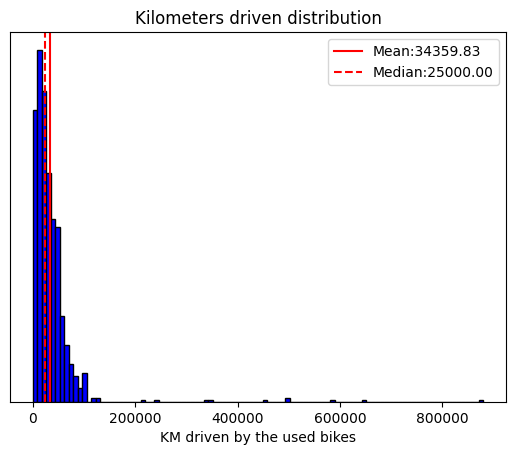

In [11]:
fig, axes = plt.subplots(1, 1)
num_bins = (df['km_driven'].max() - df['km_driven'].min()) // 150

color1 = '#1f77b4' # a shade of blue
color2 = '#ff7f0e' # a shade of orange

plt.hist(df['km_driven'], bins=100, range=(0,df['km_driven'].max()), color='blue',edgecolor='black')

plt.yticks([])
plt.title("Kilometers driven distribution")
plt.xlabel("KM driven by the used bikes")

#plt.subplots_adjust(hspace=0.5)
km_mean = df['km_driven'].mean()
plt.axvline(km_mean, color='red', linewidth=1.5, label=f'Mean:{km_mean:.2f}')
km_median = df['km_driven'].median()
plt.axvline(km_median, color='red', linewidth=1.5, label=f'Median:{km_median:.2f}', linestyle='--')


plt.legend()

plt.show()

This is a histogram for totl kilometers driven by the used bikes. The two red lines show the mean and median of the selling prices. Mean = 34359.83 and median about 25k.

In [12]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

I have tried to create a new column named as BRAND based on the name attribute.

In [13]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'
    elif i in tvs:
        return 'TVS'
    elif i in suzuki:
        return 'Suzuki'
    elif i in ktm:
        return 'KTM'
    else:
        return 'Other'

The above code creates 9 categories for the brand column.

In [14]:
df['brand'] = df['name'].apply(lambda x: brand(x))
df.head()

,name,selling_price,year,seller_type,prev_owners,km_driven,ex_showroom_price,age,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,87958.714058,5,Royal Enfield
1,Honda Dio,45000,2017,Individual,1,5650,87958.714058,7,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.000000,6,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.000000,9,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,87958.714058,13,Yamaha


<Axes: xlabel='brand', ylabel='selling_price'>

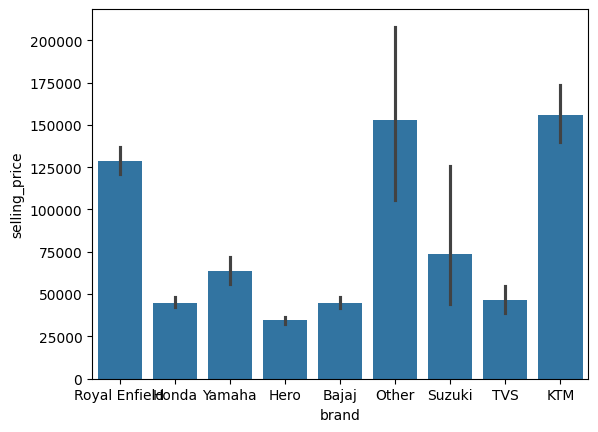

In [15]:
# @title Average Selling Price by Brand

sns.barplot(x = 'brand', y = 'selling_price', data = df)

From the above plot, we can infer that KTM has the maximum selling price on average, and why not, it's a great brand! Hero bikes have lowest selling price on avg.

In [22]:
def bar_plot(x):
    fig = go.Figure([go.Bar(
    x=df[x].value_counts().index,
    y=df[x].value_counts().values,
    text=df[x].value_counts().values)])
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(title = f'Number of bikes per {x}')
    fig.update_layout(width=1000, height=600)
    return fig

bar_plot('brand')

From the above graph, we can infer that maximum number of sold bikes are Bajaj's brand. KTM's used bikes are sold relatively less.

In [23]:
fig = px.scatter(df, x="ex_showroom_price", y="selling_price")
fig.update_layout(width=1000, height=600)
fig.show()

The above plot is a scatter plot for ex showroom price vs the new selling price of the motor bikes. As can be seen, higher the ex showroom price, higher is the new selling price.

In [20]:
fig = px.scatter(df, x="km_driven", y="selling_price", color="brand")
fig.update_layout(width=1000, height=600)
fig.show()

 This above code creates a scatter plot to visualize how the selling price of used bikes varies with the kilometers driven, with each point colored based on the brand of the bike.
 From the plot we can infer that an almost no km driven Suzuki bike is being sold at the maximum rate of 760k.
 Many TVS motor cycles with minimal kms driven are being sold at lower rates relatively.
 From the dataset, maximum number of used bikes are driven between 0 to 200k kilometers.

In [24]:
bar_plot('age')

Based on the age factor, that is how old the bike is, maximum number of bikes are between 5 to 10 years old as can be inferred from the height of the bars of the above bar plot.

In [25]:
bar_plot('seller_type')

Used motor cycles sold by the individuals constitute almost 99% of the entire dataset.

In [26]:
fig = go.Figure()
brands =  df.brand.unique()

for brand in brands:
    fig.add_trace(go.Violin(x=df['brand'][df['brand'] == brand],
                            y=df['selling_price'][df['brand'] == brand],
                            name=brand,
                            meanline_visible=True))
    fig.update_layout(width=1000, height=600)
fig.show()

 This code creates a violin plot where each violin represents the distribution of selling prices for a different brand of bike. The width of the violins represents the density of data points at different price levels, and the mean line inside each violin provides a visual indication of the average selling price for each brand.
 Again the avg selling price of KTM bikes is the highest. But Suzuki bikes have certain bikes that are sold at the maximum price like for around 760k.
Most of the royal enfield bikes are sold between the range 60K to 250K.

In [27]:
def box_plot(x,y):
    return px.box(df,
                  x=x,
                  y=y,
                  points='all',
                  title= x + ' & ' + y,
                  width=1000,
                  height=600)

box_plot('seller_type','selling_price')

As can be seen from the above box plot, dealer bikes are relatively cheaper than the bikes sold by individuals. And obviously this should be the case, since dealers deal well in prices although they aren't a majority bike sellers here.

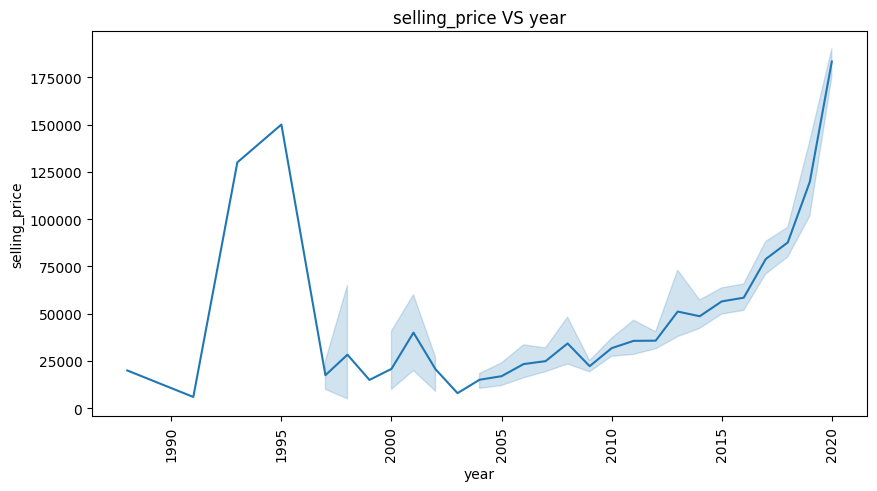

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('selling_price VS year')
sns.lineplot(data=df, y=df.selling_price, x=df.year)
plt.show()

Over the years, the bikes have become costly. Also it's the growing demand of the newer generation and with technological and infrastructural advancements, the need for vehicles specially the two wheelers is huge.
Second hand bikes have been of much use and can be easily inferred from the graph.

<Axes: title={'center': 'selling_price'}, xlabel='year'>

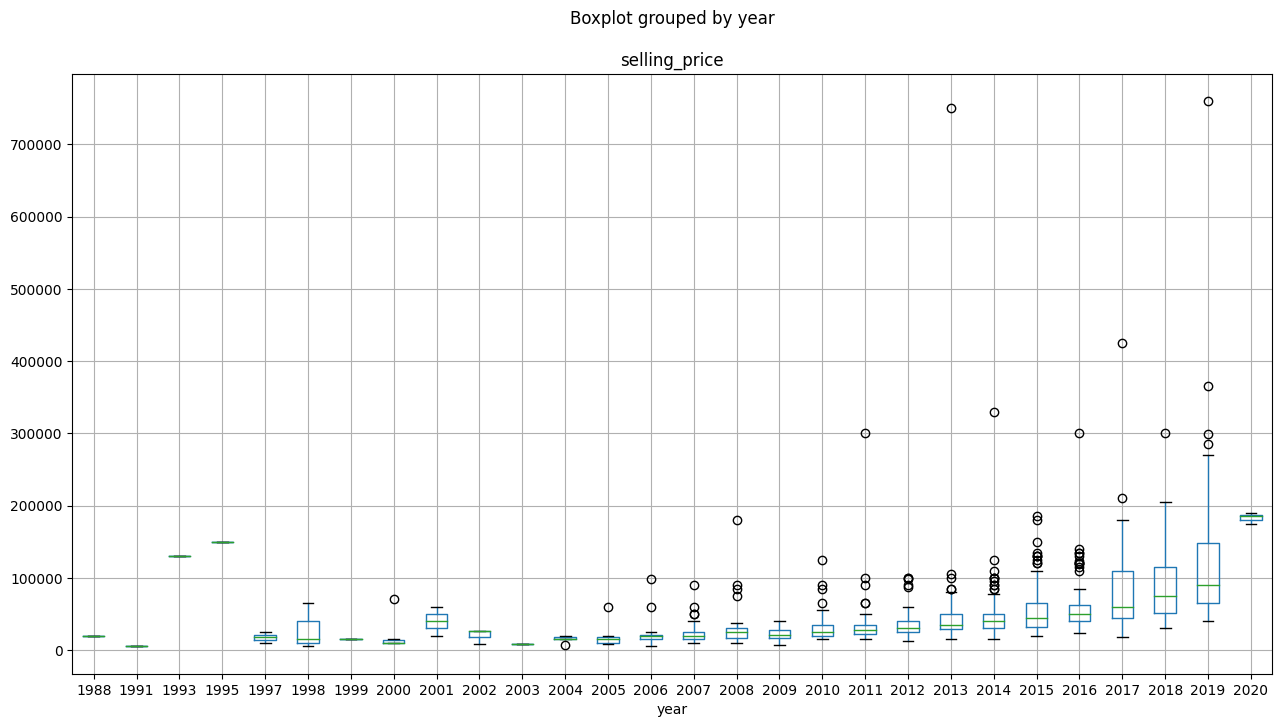

In [34]:
# shows presence of a lot of outliers values
df.boxplot(column='selling_price', by = 'year' , figsize=(15,8))

This is the box plot shown for selling prices per year.
Year 2020 has seen the bikes sold for the highest rate on average.

**Increase in selling prices over time:** The median selling price (represented by the line in the middle of the box) appears to have increased steadily over the years. This means that half of the bikes sold in a given year were sold for a price higher than the median, and the other half were sold for a price lower than the median.
**Spread of prices:** The boxes in the plot represent the interquartile range (IQR), which is the range that contains the middle 50% of the data. The size of the boxes indicates the spread of the prices within each year. There seems to be a lot of variation in prices throughout the years.
**Outliers:** The outliers are represented by the points beyond the whiskers. There are a few outliers in almost every year, which suggests that there may be some particularly expensive or inexpensive bikes sold in each year.

The above result is obviously true because of the following possible reasons:
An increase in the popularity of bicycles, leading to higher demand and higher prices.
An increase in the cost of materials and labor required to produce bicycles.
An improvement in the quality of bicycles, leading to higher prices for higher-end models.

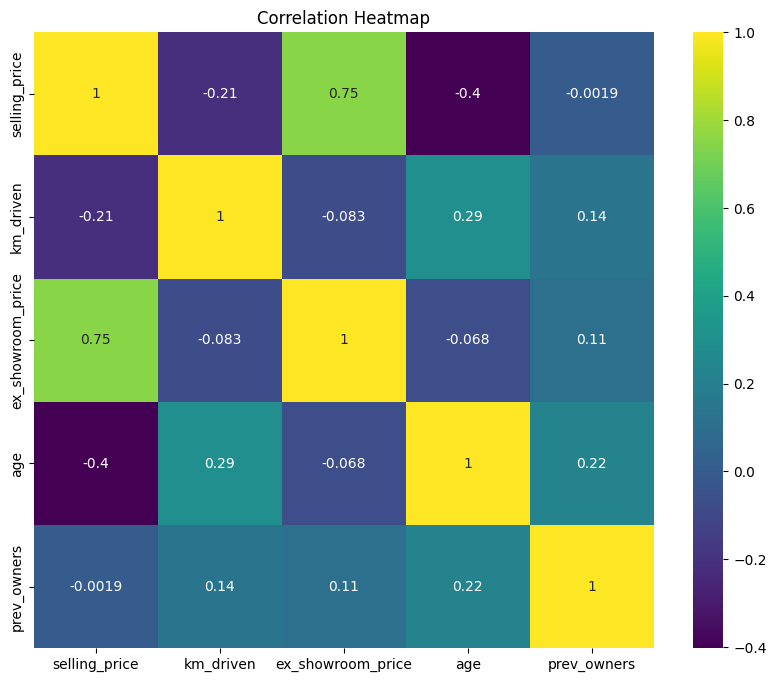

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['selling_price', 'km_driven', 'ex_showroom_price', 'age', 'prev_owners']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


The variables on the graph are: selling price, mileage (km driven), ex-showroom price, age of the bike, and the number of previous owners.
A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation. A correlation coefficient close to 0 indicates no correlation.
For instance, there is a strong positive correlation (0.75) between the ex-showroom price and the selling price. This means that cars with a higher ex-showroom price tend to also have a higher selling price.
There is a moderate negative correlation (-0.4) between the age of the car and the selling price. This means that cars that are older tend to sell for a lower price.
There is a weak positive correlation (0.14) between the number of previous owners and the mileage.

In [ ]:
# Interactive 3D scatter plot for selling price, km driven, and age
fig = px.scatter_3d(df, x='km_driven', y='age', z='selling_price', color='seller_type',
                    title='Interactive 3D Scatter Plot: Selling Price, Km Driven, and Age')
fig.show()


 The code creates an interactive 3D scatter plot showing the relationship between 'km_driven', 'age', and 'selling_price' with different colors representing different types of sellers.

In [ ]:
df_sorted = df.sort_values(by='year')
df_sorted['cumulative_selling_price'] = df_sorted['selling_price'].cumsum()

fig = px.area(df_sorted, x='year', y='cumulative_selling_price', title='Area Plot of Cumulative Selling Price over Years')
fig.update_layout(width=800, height=500)
fig.show()


The code generates an area plot showing how the cumulative selling price of bikes has changed over the years. So, yes, the cumulative selling has shown a huge increase over the years.

In [35]:
import plotly.express as px

# Calculate average selling price per brand
average_selling_price_per_brand = df.groupby('brand')['selling_price'].mean().reset_index()

# Create line plot
fig = px.line(average_selling_price_per_brand, x='brand', y='selling_price', title='Average Selling Price per Brand')
fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Average Selling Price')
  # Set the size of the figure
fig.update_layout(width=1000, height=600)
fig.update_traces(mode='markers+lines', marker=dict(size=8,color='red'))
fig.show()


Brands with highest and lowest average selling prices: Based on the graph, Hero appears to have the lowest average selling price, while KTM appears to have the highest. It's important to note that the range of prices across brands can be significant.

Limited data for some brands: The graph groups some brands under the category 'Other'. This suggests that there might not be enough data to show the average selling price for each of those brands individually. This is due to the factor many unpopular brands having only a limited amount of bikes were grouped together into 'Other'.

# Model Fitting
Model fitting is a crucial step in machine learning where we train a model to learn patterns from the training data. It involves finding the best parameters for the model that minimize the difference between the model's predictions and the actual target values.

Here's a brief description of the model fitting process:

**Select a Model:** First, we choose a suitable machine learning algorithm based on the problem we're trying to solve, the type of data we have, and the assumptions of the model.
**Split the Data:** Next, we split the available data into two sets: training data and testing data. The training data is used to fit the model, while the testing data is used to evaluate its performance.
**Instantiate the Model:** Then, we create an instance of the chosen model class. This involves specifying any hyperparameters, which are parameters that control the learning process and model complexity.
**Fit the Model:** The model is trained on the training data by calling the fit method. During this step, the model adjusts its internal parameters to minimize the difference between its predictions and the actual target values.
**Evaluate the Model:** After training, we evaluate the model's performance on the testing data to assess how well it generalizes to unseen data. Common evaluation metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2).
The model fitting process is iterative and may involve experimenting with different algorithms, hyperparameters, and preprocessing techniques to find the best-performing model for our specific task.

**Seller_Type , Owner columns are textual data so we transformed them to integer**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#Encoding Labels

le = LabelEncoder()
df['seller_type'] = le.fit_transform(df["seller_type"])
df['brand'] = le.fit_transform(df["brand"])
# splitting data into features and target


**Linear Regression**
The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the observed and predicted values. This line represents the relationship between the independent variables and the dependent variable.

Linear Regression is widely used for prediction and inference in various fields such as economics, finance, healthcare, and engineering. It is a fundamental technique in statistical modeling and machine learning, forming the basis for more advanced regression methods.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[['year','seller_type','prev_owners','km_driven','ex_showroom_price','brand', 'age']]  # Features
y = df['selling_price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 19163.67969735494
Mean Squared Error (MSE): 670592385.9675605
Root Mean Squared Error (RMSE): 25895.798616137727
R^2 Score: 0.7456784955876338


In [59]:
import plotly.graph_objects as go
import numpy as np

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Regression line
x_values = np.linspace(min(y_test), max(y_test), 100)
reg_line = go.Scatter(x=x_values, y=x_values, mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, reg_line])

# Updating layout
fig.update_layout(
    title='Results of Linear Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


The relation between actual and predicted prices is almost linear with some variations.

**Decision Tree Regressor**
Decision tree regression is a predictive modeling approach that builds a decision tree from the training data. It partitions the feature space into regions, where each region corresponds to a leaf node in the tree. The algorithm splits the feature space at each node based on the feature that provides the best split, resulting in a tree-like structure.

During training, the decision tree algorithm learns to predict the target variable by fitting a simple model (e.g., a constant value) to the training data within each region. The prediction for a new data point is made by traversing the tree from the root node to a leaf node based on the feature values of the data point.

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_tree = tree_model.predict(X_test)

# Evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_tree)
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R^2 Score:", r2_tree)


Decision Tree Regression Evaluation Metrics:
Mean Absolute Error (MAE): 17189.713615023473
Mean Squared Error (MSE): 845075868.9248827
Root Mean Squared Error (RMSE): 29070.18866338646
R^2 Score: 0.6795058058742104


In [61]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_tree, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of Decision Tree Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


**KNN Regressor**
KNN regression works by finding the k nearest neighbors of a given data point in the feature space. The "closeness" of neighbors is typically determined by a distance metric, such as Euclidean distance. Once the nearest neighbors are identified, the algorithm predicts the output for the new data point by averaging the outputs of its k nearest neighbors (in the case of regression).

During training, KNN regression does not learn an explicit model. Instead, it stores the entire training dataset, which can be computationally expensive for large datasets. However, prediction is fast since it only involves finding the nearest neighbors.

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R^2 Score:", r2_knn)


KNN Regression Evaluation Metrics:
Mean Absolute Error (MAE): 20559.475117370894
Mean Squared Error (MSE): 850281804.2007512
Root Mean Squared Error (RMSE): 29159.59197589622
R^2 Score: 0.6775314600287502


In [63]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_knn, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of KNN Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


**Random Forest Regression**
Random Forest Regression builds multiple decision trees during training, where each tree is trained on a random subset of the training data and a random subset of the features. The prediction of the Random Forest model is the average prediction of all individual trees in the forest.

During training, each decision tree in the forest is trained independently. To make a prediction, the input data is passed through each tree in the forest, and the predictions of all trees are averaged to produce the final output.

Random Forest Regression is robust against overfitting because it combines the predictions of multiple trees, which helps to reduce the variance of the model. It can handle high-dimensional data and is less sensitive to outliers compared to some other regression algorithms.

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R^2 Score:", r2_rf)


Random Forest Regression Evaluation Metrics:
Mean Absolute Error (MAE): 13058.098835606228
Mean Squared Error (MSE): 402529621.19834477
Root Mean Squared Error (RMSE): 20063.14086075121
R^2 Score: 0.8473410361109363


In [65]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_rf, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of Random Forest Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


**Lasso Regression Model**
Lasso Regression is a linear regression technique that penalizes the absolute size of the coefficients in the regression model. It does this by adding a penalty term to the least squares objective function, which is the sum of the squared differences between the observed and predicted values.

The Lasso regularization term is the absolute sum of the coefficients multiplied by a hyperparameter alpha (λ). This term encourages sparsity in the coefficient vector, meaning it pushes some coefficients to exactly zero, effectively performing feature selection.

Lasso Regression is particularly useful when dealing with high-dimensional datasets where many features may be irrelevant or redundant. By setting some coefficients to zero, Lasso can automatically perform feature selection and provide a more interpretable model.

In [66]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Lasso regressor
lasso_model = Lasso(alpha=0.1, random_state=42)  # You can adjust the alpha parameter for regularization

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R^2 Score:", r2_lasso)


Lasso Regression Evaluation Metrics:
Mean Absolute Error (MAE): 19163.580335466464
Mean Squared Error (MSE): 670587345.7859312
Root Mean Squared Error (RMSE): 25895.701299364944
R^2 Score: 0.7456804070715715


In [67]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_lasso, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of Lasso Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


**Ridge Regression Model**
Ridge Regression, also known as Tikhonov regularization, is a linear regression technique that adds a penalty term to the least squares objective function. This penalty term is the sum of the squared coefficients multiplied by a hyperparameter alpha (λ).

The addition of the regularization term penalizes large coefficients in the regression model, which helps to reduce the variance of the model and mitigate overfitting. Unlike Lasso Regression, Ridge Regression does not lead to sparsity in the coefficient vector; instead, it shrinks the coefficients towards zero.

Ridge Regression is particularly useful when dealing with multicollinearity, where predictors are highly correlated with each other. By shrinking the coefficients, Ridge Regression can improve the stability of the model and make it less sensitive to small changes in the input data.

In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Ridge regressor
ridge_model = Ridge(alpha=1.0, random_state=42)  # You can adjust the alpha parameter for regularization

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R^2 Score:", r2_ridge)


Ridge Regression Evaluation Metrics:
Mean Absolute Error (MAE): 19160.994247113857
Mean Squared Error (MSE): 670464886.0452436
Root Mean Squared Error (RMSE): 25893.33671130941
R^2 Score: 0.7457268498080731


In [69]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_ridge, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of Ridge Regression Model',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()


**Polynomial Features Regression**
Polynomial Regression extends the ordinary linear regression model by allowing the relationship between the independent variable(s) and the dependent variable to be modeled as an nth degree polynomial. Instead of fitting a straight line, Polynomial Regression fits a curve to the data.

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of polynomial as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
poly_model = LinearRegression()

# Fit the model on the polynomial features
poly_model.fit(X_train_poly, y_train)

# Predict on the testing data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression Evaluation Metrics:
Mean Absolute Error (MAE): 16734.08144326515
Mean Squared Error (MSE): 532304278.62214667
Root Mean Squared Error (RMSE): 23071.72032212047
R^2 Score: 0.7981241246140953


In [71]:
import plotly.graph_objects as go

# Scatter plot of actual vs. predicted values
scatter = go.Scatter(x=y_test, y=y_pred_poly, mode='markers', marker=dict(color='blue'), name='Actual vs. Predicted')

# Perfect prediction line
perfect_prediction = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction')

# Creating the plot
fig = go.Figure([scatter, perfect_prediction])

# Updating layout
fig.update_layout(
    title='Results of Polynomial Regression',
    xaxis_title='Actual Selling Price',
    yaxis_title='Predicted Selling Price',
    legend=dict(title='Legend'),
    template='plotly_white'
)

# Show the plot
fig.show()



# Comparison of the models based on evaluation metrics

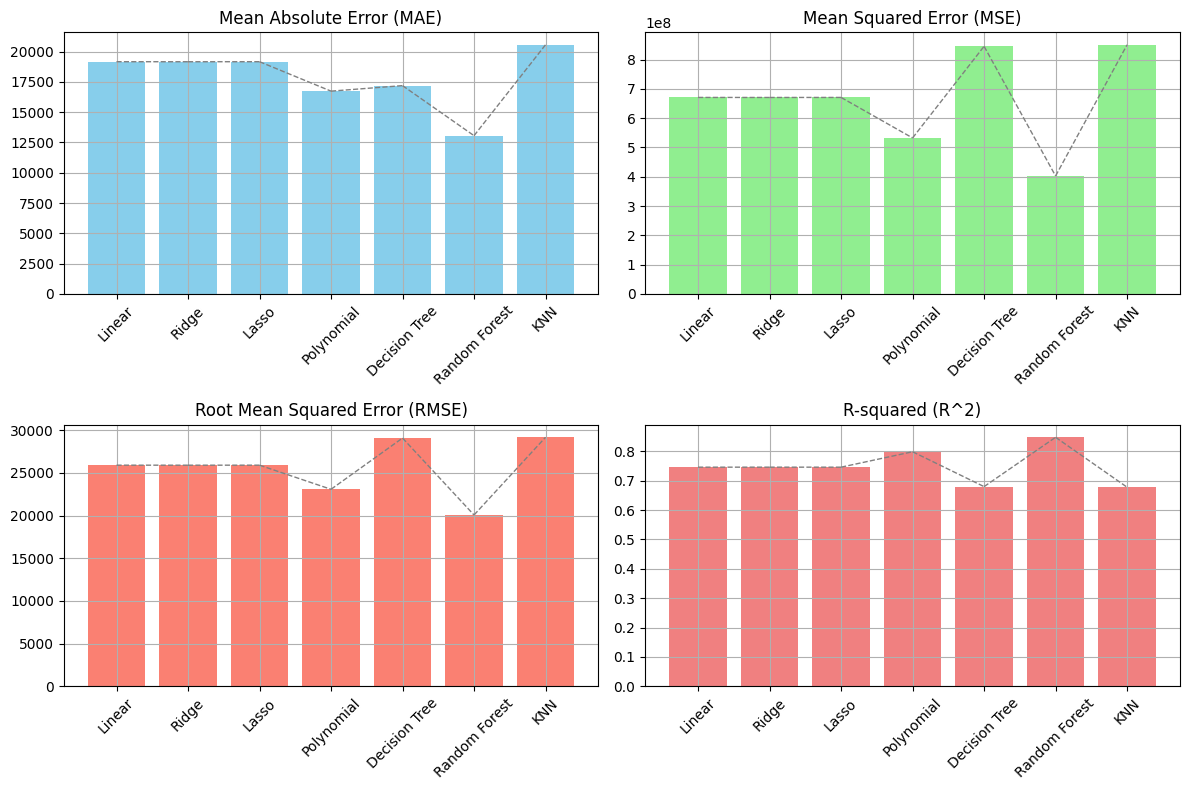

In [72]:
import matplotlib.pyplot as plt

# Evaluation metrics for different regression methods
models = ['Linear', 'Ridge', 'Lasso', 'Polynomial', 'Decision Tree', 'Random Forest','KNN']
mae_values = [mae, mae_ridge, mae_lasso,  mae_poly,  mae_tree, mae_rf,mae_knn]
mse_values = [mse, mse_ridge, mse_lasso,  mse_poly,  mse_tree, mse_rf,mse_knn]
rmse_values = [rmse, rmse_ridge, rmse_lasso, rmse_poly,  rmse_tree, rmse_rf,rmse_knn]
r2_values = [r2, r2_ridge, r2_lasso,  r2_poly,  r2_tree, r2_rf,r2_knn]

# Plotting the evaluation metrics
plt.figure(figsize=(12, 8))

# Function to add lines connecting the tops of each bar
def add_line_connectors(bars):
    for bar1, bar2 in zip(bars[:-1], bars[1:]):
        plt.plot([bar1.get_x() + bar1.get_width() / 2, bar2.get_x() + bar2.get_width() / 2],
                 [bar1.get_height(), bar2.get_height()],
                 color='grey', linestyle='--', linewidth=1)

# MAE plot
plt.subplot(2, 2, 1)
mae_bars = plt.bar(models, mae_values, color='skyblue')
add_line_connectors(mae_bars)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.grid(True)

# MSE plot
plt.subplot(2, 2, 2)
mse_bars = plt.bar(models, mse_values, color='lightgreen')
add_line_connectors(mse_bars)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.grid(True)

# RMSE plot
plt.subplot(2, 2, 3)
rmse_bars = plt.bar(models, rmse_values, color='salmon')
add_line_connectors(rmse_bars)
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.grid(True)

# R^2 plot
plt.subplot(2, 2, 4)
r2_bars = plt.bar(models, r2_values, color='lightcoral')
add_line_connectors(r2_bars)
plt.title('R-squared (R^2)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


We have compared the evaluation mertics for all the six models we have used.
Random Forest have shown the best results with maximum R2 score leaving the decision tree and KNN model being behind.
The MSE and the RMSE for decision tree and KNN Regression is reported the highest due to which the R2 score went down.
However the three linear models, linear, ridge and lasso regression have similar metrics for evaluation.

So for our dataset, **Random Forest has been the best model** for used motor cycle prediction.